<a href="https://colab.research.google.com/github/MaStEr156/Blood-Bank-Management-System/blob/main/Image_Processing_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
!pip install tensorflow_datasets

In [25]:
import tensorflow as tf
import tensorflow_datasets as tfds
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [26]:
dataset, info = tfds.load('cats_vs_dogs', with_info=True, as_supervised=True)

In [27]:
class_names = info.features['label'].names
class_names

['cat', 'dog']

**Info**

In [28]:
for i, example in enumerate(dataset['train']):
  # example = (image, label)
  image, label = example
  save_dir = './cats_vs_dogs/train/{}'.format(class_names[label])
  os.makedirs(save_dir, exist_ok=True)

  filename = save_dir + "/" + "{}_{}.jpg".format(class_names[label], i)
  tf.keras.preprocessing.image.save_img(filename, image.numpy())
  # print(filename)
  # break

In [29]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential

In [30]:
datagen = ImageDataGenerator(rescale=1/255, validation_split=0.2, rotation_range=10,
                              width_shift_range=0.1, height_shift_range=0.1,
                             shear_range=0.1, zoom_range=0.10, horizontal_flip=True)

train_generator = datagen.flow_from_directory('/content/cats_vs_dogs/train',
                                              target_size = (150, 150),
                                              batch_size=64,
                                              class_mode='binary',
                                              subset='training')

validation_generator = datagen.flow_from_directory('/content/cats_vs_dogs/train',
                                              target_size = (150, 150),
                                              batch_size=64,
                                              class_mode='binary',
                                              subset='validation')

Found 18611 images belonging to 2 classes.
Found 4651 images belonging to 2 classes.


**build CNN Model**

In [31]:
from keras.backend import batch_normalization
model = Sequential()

# 1st layer CNN
model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(2))
# model.add(BatchNormalization())
# model.add(Dropout(0.2))

# 2nd layer CNN
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(2))
# model.add(BatchNormalization())
# model.add(Dropout(0.2))

# 3rd Layer
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(2))
# model.add(BatchNormalization())
# model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [32]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 17, 17, 128)      

In [33]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(train_generator, epochs=10, validation_data=validation_generator)

Epoch 1/10
291/291 [==============================] - 179s 598ms/step - loss: 0.6692 - accuracy: 0.5920 - val_loss: 0.6075 - val_accuracy: 0.6680
Epoch 2/10
291/291 [==============================] - 161s 552ms/step - loss: 0.5645 - accuracy: 0.7076 - val_loss: 0.5194 - val_accuracy: 0.7448
Epoch 3/10
291/291 [==============================] - 160s 549ms/step - loss: 0.5151 - accuracy: 0.7457 - val_loss: 0.4911 - val_accuracy: 0.7538
Epoch 4/10
291/291 [==============================] - 161s 555ms/step - loss: 0.4769 - accuracy: 0.7714 - val_loss: 0.4508 - val_accuracy: 0.7955
Epoch 5/10
291/291 [==============================] - 165s 568ms/step - loss: 0.4457 - accuracy: 0.7913 - val_loss: 0.4397 - val_accuracy: 0.8009
Epoch 6/10
291/291 [==============================] - 167s 574ms/step - loss: 0.4233 - accuracy: 0.8021 - val_loss: 0.4038 - val_accuracy: 0.8205
Epoch 7/10
291/291 [==============================] - 168s 578ms/step - loss: 0.4058 - accuracy: 0.8157 - val_loss: 0.4040 -

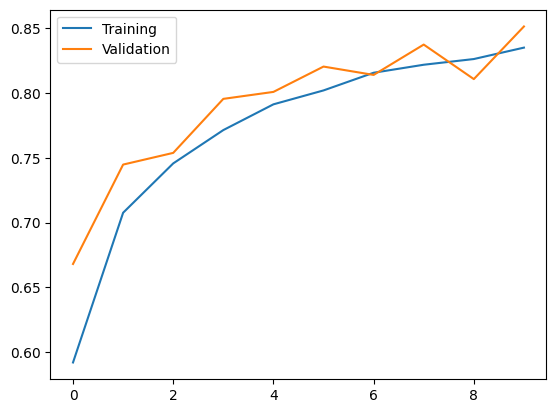

In [34]:
history.history

plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.legend(['Training', 'Validation'])

In [35]:
# save model
model.save('cats_vs_dogs.h5')

In [36]:
model_load = tf.keras.models.load_model('cats_vs_dogs.h5')

In [38]:
import requests
from PIL import Image
from tensorflow.keras.preprocessing import image
img_url = "https://www.shutterstock.com/image-photo/funny-british-shorthair-cat-portrait-600nw-2097266809.jpg"
img = Image.open(requests.get(img_url, stream=True).raw).resize((150, 150))

image_array = image.img_to_array(img)

img = np.expand_dims(image_array, axis=0)

img = img/255

prediction = model.predict(img)

TH = 0.5
prediction = int(prediction[0][0]>TH)
classes = {v:k for k,v in train_generator.class_indices.items()}
classes[prediction]

1/1 [==============================] - 0s 20ms/step


'cat'